# Using Simple Bernoulli Trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure)

In [10]:
def perform_bernoulli_trials(n, p):
    '''perform n bernoulli trials with probability of success p and return the total no of successes'''
    n_success = 0
    for _ in range(n):
        random_number = np.random.random()
        
        if random_number < p:
            n_success +=1
    return n_success

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

<b>How many defaults might we expect?</b>
<br/>
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. we would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, we will do a simulation. we will perform 100 Bernoulli trials using the perform_bernoulli_trials() function we wrote abovee and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) we will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

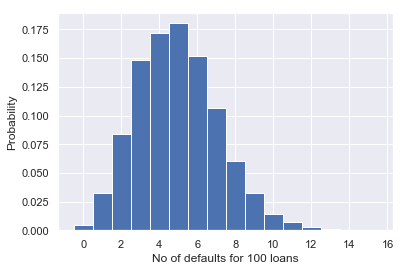

In [29]:
np.random.seed(42)
#initializing the n_defaults
n_defaults = np.empty(10000)
for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, density = True, bins = np.arange(0, max(n_defaults)+1.5)-0.5)
_ = plt.xlabel('No of defaults for 100 loans')
_ = plt.ylabel('Probability')
plt.show()

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

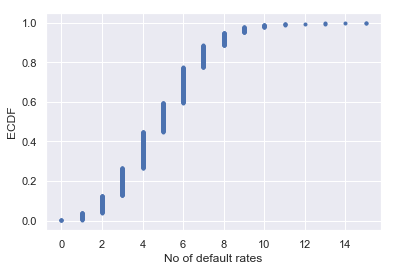

In [11]:
# plotting ecdf
x,y = ecdf(n_defaults)
plt.figure()
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('No of default rates')
_ = plt.ylabel('ECDF')
plt.show()


In [13]:
np.sum(n_defaults>=10)/len(n_defaults)

0.022

So we have a 0.022 probability of losing money if we have 10 or more defaulters

# Using Binomial Distribution

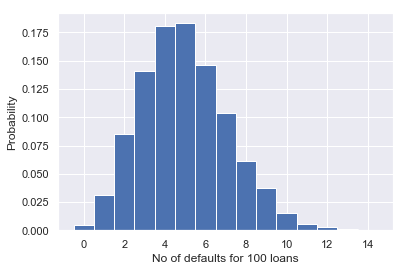

In [28]:
np.random.seed(42)
# doing 10000 trials using binomial
n_defaults = np.random.binomial(n=100, p = 0.05, size = 10000) #n is no of trials, p is the probabilty of success and size is how many times we want to repeat the experiment
# the above method is more computationally efficient
_ = plt.hist(n_defaults, density = True, bins = np.arange(0, max(n_defaults)+1.5)-0.5)
_ = plt.xlabel('No of defaults for 100 loans')
_ = plt.ylabel('Probability')
plt.show()

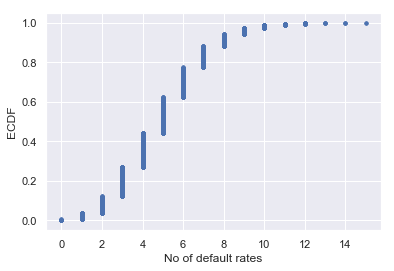

In [30]:
# plotting ecdf
x,y = ecdf(n_defaults)
plt.figure()
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('No of default rates')
_ = plt.ylabel('ECDF')
plt.show()
